Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Validation accuracy for epoch 1 is: 0.885200023651123
Train accuracy for epoch 1 is: 0.8912363648414612
Validation accuracy for epoch 2 is: 0.9358000159263611
Train accuracy for epoch 2 is: 0.9393636584281921
Validation accuracy for epoch 3 is: 0.9423999786376953
Train accuracy for epoch 3 is: 0.9499454498291016
Validation accuracy for epoch 4 is: 0.944599986076355
Train accuracy for epoch 4 is: 0.9559817910194397
Validation accuracy for epoch 5 is: 0.9470000267028809
Train accuracy for epoch 5 is: 0.9620727300643921
Validation accuracy for epoch 6 is: 0.9545999765396118
Train accuracy for epoch 6 is: 0.9660181999206543
Validation accuracy for epoch 7 is: 0.9545999765396118
Train accuracy for epoch 7 is: 0.9727272987365723
Validation accuracy for epoch 8 is: 0.9607999920845032
Train accuracy for

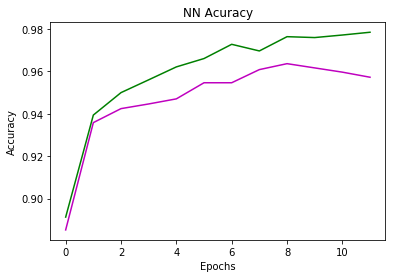

Test resualt:
0.9628


In [15]:
import tensorflow as tf
import tensorflow.examples.tutorials.mnist.input_data as input_data
import numpy as np
import matplotlib.pyplot as plt

mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)
n_input = 784
n_output = 10
net_input = tf.placeholder(tf.float32, [None, n_input])
y_true = tf.placeholder(tf.float32, [None, 10])

# experiment with different architectures (amount of layers, size of layers, activation function, etc.)
# Layer 1
hidden_size = 256
W1 = tf.Variable(tf.truncated_normal([n_input, hidden_size]))
b1 = tf.Variable(tf.truncated_normal([hidden_size]))
W2 = tf.Variable(tf.truncated_normal([hidden_size, n_output]))
b2 = tf.Variable(tf.truncated_normal([n_output]))
net_output = tf.nn.relu(tf.matmul(net_input, W1) + b1)  # try sigmoid, tanh, etc.
net_output = tf.nn.dropout(net_output, 0.9)  # try different dropout (this is the % to keep units)
net_output = (tf.matmul(net_output, W2) + b2)


#Layer 2
hiddenSize2 = 500
W3 = tf.Variable(tf.truncated_normal([n_input, hiddenSize2]))
b1 = tf.Variable(tf.truncated_normal([hiddenSize2]))
W4 = tf.Variable(tf.truncated_normal([hiddenSize2, n_output]))
b2 = tf.Variable(tf.truncated_normal([n_output]))
net_output = tf.nn.sigmoid(tf.matmul(net_input, W3) + b1)  # try sigmoid, tanh, etc.
net_output = tf.nn.dropout(net_output, 0.855)  # try different dropout (this is the % to keep units)
net_output = (tf.matmul(net_output, W4) + b2)

#Layer 3
hiddenSize3 = 600
W5 = tf.Variable(tf.truncated_normal([n_input, hiddenSize3]))
b3 = tf.Variable(tf.truncated_normal([hiddenSize3]))
W6 = tf.Variable(tf.truncated_normal([hiddenSize3, n_output]))
b4 = tf.Variable(tf.truncated_normal([n_output]))
net_output = tf.nn.relu6(tf.matmul(net_input, W5) + b3)  # try sigmoid, tanh, etc.
net_output = tf.nn.dropout(net_output, 0.725)  # try different dropout (this is the % to keep units)
net_output = (tf.matmul(net_output, W6) + b4)


correct_prediction = tf.equal(tf.argmax(net_output, 1), tf.argmax(y_true, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
cost = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits(logits=net_output, labels=y_true))

eta = 0.0125 # try different values here [0.0001,...,0.1]

# you can experiment with different optimizers
#optimizer = tf.train.AdamOptimizer(eta).minimize(cost)
#optimizer = tf.train.GradientDescentOptimizer(eta).minimize(cost)
optimizer = tf.train.RMSPropOptimizer(eta).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())
l_loss = list()
l_loss2 = list()

batch_size = 350  # see how batch size influences the learning process
n_epochs = 12  # see how many epochs are needed to learn, when over-fitting occurs
for epoch_i in range(n_epochs):
    for batch_i in range(0, mnist.train.num_examples, batch_size):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        sess.run(optimizer, feed_dict={
            net_input: batch_xs,
            y_true: batch_ys
        })
    loss = sess.run(accuracy, feed_dict={
                       net_input: mnist.validation.images,
                       y_true: mnist.validation.labels })
    loss2 = sess.run(accuracy, feed_dict={
                       net_input: mnist.train.images,
                       y_true: mnist.train.labels })
    print('Validation accuracy for epoch {} is: {}'.format(epoch_i + 1, loss))
    print('Train accuracy for epoch {} is: {}'.format(epoch_i + 1, loss2))
    l_loss.append(loss)
    l_loss2.append(loss2)
    

plt.title('NN Acuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.plot(l_loss, color='m')  #validation loss
plt.plot(l_loss2, color='g') #train loss
plt.show()

print ('Test resualt:')
print(sess.run(accuracy, feed_dict={net_input: mnist.test.images, y_true: mnist.test.labels}))
    